## Seeding dynamic for a 2D kinematic driver

#### based on the stratocumulus stream function from Morrison & Grabowski 2007 and setup from Arabas et al. 2015
https://doi.org/10.1175/JAS3980

(see the Arabas et al. 2015 example in PySDM for more details)

In [1]:
import numpy as np
import xarray
from tqdm import tqdm

from PySDM import Formulae
from PySDM.physics import in_unit, si
from PySDM_examples.seeding.settings_2d import Settings
from PySDM_examples.seeding.simulation_2d import Simulation
from PySDM_examples.Szumowski_et_al_1998 import Storage
from PySDM_examples.seeding.spin_up_2d import SpinUp

import matplotlib.pyplot as plt
from matplotlib import pyplot
from PySDM_examples.Shipway_and_Hill_2012 import plot
from open_atmos_jupyter_utils import show_plot

In [2]:
np.random.seed(123)

common_params = {
    "grid": (25, 25),
    "size": (1500 * si.metres, 1500 * si.metres),
    "simulation_time": 5400 * si.second,
    "dt": 5 * si.second,
    "spin_up_time": 1800 * si.second,
    "particles_per_volume_STP": 50 / si.cm**3,
    "n_sd_per_gridbox": 32,
    "radius": 0.04 * si.micrometre,
    "kappa": .3,
    "z_part": (0., 1),
    "x_part": (0., 1),
    "n_sd_seeding": 62,
    "seed_particles_per_volume_STP": 50 / si.cm**3,
    "seed_radius": 1 * si.micrometre,
    "seed_kappa": .8,
}

settings = Settings(
    Formulae(seed= np.random.randint(1000)),
    **common_params,
    super_droplet_injection_rate = lambda time: 1 if 5 * si.min < time < 10 * si.min else 0,
    )

storage = Storage()
simulation = Simulation(settings, storage, SpinUp= SpinUp)
simulation.reinit()
simulation.run()

/Users/hyfives-lamont/Desktop/cloud_seeding/PySDM/PySDM/backends/numba.py:48: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


0.0% (times since last print: cpu=15.1s wall=12.0s)


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


1.1% (times since last print: cpu=30.0s wall=30.1s)
2.2% (times since last print: cpu=0.5s wall=0.5s)
3.3% (times since last print: cpu=0.5s wall=0.5s)
4.4% (times since last print: cpu=0.5s wall=0.5s)
5.6% (times since last print: cpu=0.5s wall=0.5s)
6.7% (times since last print: cpu=1.5s wall=1.5s)
7.8% (times since last print: cpu=1.3s wall=1.3s)
8.9% (times since last print: cpu=1.6s wall=1.6s)
10.0% (times since last print: cpu=1.6s wall=1.6s)
11.1% (times since last print: cpu=1.8s wall=1.8s)
12.2% (times since last print: cpu=0.9s wall=1.0s)
13.3% (times since last print: cpu=0.6s wall=0.6s)
14.4% (times since last print: cpu=0.6s wall=0.6s)
15.6% (times since last print: cpu=0.6s wall=0.6s)
16.7% (times since last print: cpu=0.6s wall=0.6s)
17.8% (times since last print: cpu=0.6s wall=0.6s)
18.9% (times since last print: cpu=0.6s wall=0.6s)
20.0% (times since last print: cpu=0.6s wall=0.6s)
21.1% (times since last print: cpu=0.6s wall=0.6s)
22.2% (times since last print: cpu=0.

In [3]:
rain_arr= []
for i in settings.output_steps:
    rain_arr.append(storage.load('rain water mixing ratio', i))

t_arr= np.array([            0,   60000000000,  120000000000,  180000000000,
    240000000000,  300000000000,  360000000000,  420000000000,
    480000000000,  540000000000,  600000000000,  660000000000,
    720000000000,  780000000000,  840000000000,  900000000000,
    960000000000, 1020000000000, 1080000000000, 1140000000000,
    1200000000000, 1260000000000, 1320000000000, 1380000000000,
    1440000000000, 1500000000000, 1560000000000, 1620000000000,
    1680000000000, 1740000000000, 1800000000000, 1860000000000,
    1920000000000, 1980000000000, 2040000000000, 2100000000000,
    2160000000000, 2220000000000, 2280000000000, 2340000000000,
    2400000000000, 2460000000000, 2520000000000, 2580000000000,
    2640000000000, 2700000000000, 2760000000000, 2820000000000,
    2880000000000, 2940000000000, 3000000000000, 3060000000000,
    3120000000000, 3180000000000, 3240000000000, 3300000000000,
    3360000000000, 3420000000000, 3480000000000, 3540000000000,
    3600000000000, 3660000000000, 3720000000000, 3780000000000,
    3840000000000, 3900000000000, 3960000000000, 4020000000000,
    4080000000000, 4140000000000, 4200000000000, 4260000000000,
    4320000000000, 4380000000000, 4440000000000, 4500000000000,
    4560000000000, 4620000000000, 4680000000000, 4740000000000,
    4800000000000, 4860000000000, 4920000000000, 4980000000000,
    5040000000000, 5100000000000, 5160000000000, 5220000000000,
    5280000000000, 5340000000000, 5400000000000], dtype='timedelta64[ns]')
z_arr= np.array([  30.,   90.,  150.,  210.,  270.,  330.,  390.,  450.,  510.,  570.,
    630.,  690.,  750.,  810.,  870.,  930.,  990., 1050., 1110., 1170.,
    1230., 1290., 1350., 1410., 1470.], dtype= np.float32)
x_arr= np.array([  30.,   90.,  150.,  210.,  270.,  330.,  390.,  450.,  510.,  570.,
    630.,  690.,  750.,  810.,  870.,  930.,  990., 1050., 1110., 1170.,
    1230., 1290., 1350., 1410., 1470.], dtype= np.float32)

rain_xarr= xarray.DataArray(data= np.array(rain_arr), \
                        dims=["T", "X", "Z"],
                        coords=dict(
                            T= (["T"], t_arr,),
                            X= (["X"], x_arr,),
                            Z= (["Z"], z_arr,),)
                        )

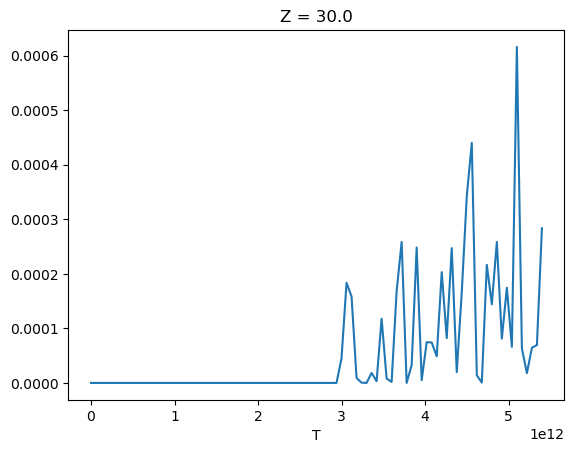

In [4]:
rain_xarr.sel(Z= 30).sum(dim= 'X').plot()

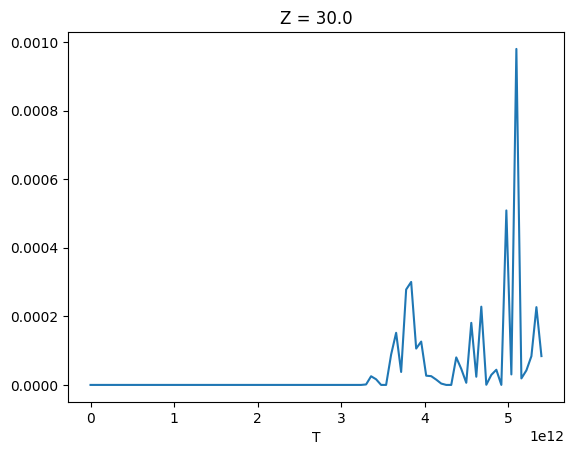

In [4]:
rain_xarr.sel(Z= 30).sum(dim= 'X').plot()